In [1]:
import pandas as pd
import urllib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
import random


In [2]:
MAX_SENTENCES = 8
MAX_SENTENCE_LENGTH = 20

In [3]:
df = pd.read_csv('/root/corona/hatespeech/Data/data_waseem_3.csv',encoding = "ISO-8859-1")
df = df[['hate','comment']]
df = df.sample(frac=1).reset_index(drop=True)
df

,hate,comment
0,0,@BrianHallDev redis is overkill for what i'm d...
1,0,"@Vent_Oh your caveat that ""it's not cool when ..."
2,1,.@MarciaCrocker01 @trishesdishes ..mistake. I ...
3,0,RT @Glen_Noyce: Can't believe that Kat and And...
4,0,@theMirai @SirGoldenrod @sloshedtrain2 @srhbut...
...,...,...
16130,0,Fuck they're dragging out #MKR
16131,0,Why would you serve this shit to Colin. Honest...
16132,0,@Nebula1979 @CherguiaMbark You have now repeat...
16133,0,Bless I totally forgot about the party favouri...


In [4]:
nohate_count = len(df[df['hate'] == 0])
sexism_count = len(df[df['hate'] == 1])
racism_count = len(df[df['hate'] == 2])
print(nohate_count)
print(sexism_count)
print(racism_count)

11033
3167
1935


In [5]:
nohate = df[df.hate == 0].index
sexism = df[df.hate == 1].index
racism = df[df.hate == 2].index
print(nohate)
print(sexism)
print(racism)
type(nohate)

Int64Index([    0,     1,     3,     4,     7,     9,    11,    12,    13,
               14,
            ...
            16122, 16124, 16125, 16126, 16127, 16130, 16131, 16132, 16133,
            16134],
           dtype='int64', length=11033)
Int64Index([    2,     5,    10,    15,    19,    22,    23,    40,    44,
               48,
            ...
            16100, 16102, 16104, 16105, 16113, 16115, 16119, 16123, 16128,
            16129],
           dtype='int64', length=3167)
Int64Index([    6,     8,    32,    33,    34,    54,    63,    71,    76,
               90,
            ...
            16034, 16035, 16041, 16062, 16075, 16089, 16090, 16095, 16103,
            16114],
           dtype='int64', length=1935)


pandas.core.indexes.numeric.Int64Index

In [6]:
nohate = np.random.choice(nohate,racism_count, replace=False)
sexism = np.random.choice(sexism,racism_count, replace=False)
racism = np.random.choice(racism,racism_count, replace=False)

In [7]:
print(len(nohate))
print(len(sexism))
print(len(racism))
print(len(nohate)*0.9)
print(len(nohate)*0.1)
print((len(nohate)+len(sexism)+len(racism))*0.9)

1935
1935
1935
1741.5
193.5
5224.5


In [8]:
nohate_train = nohate[:1741]
nohate_test = nohate[1741:]
sexism_train = sexism[:1741]
sexism_test = sexism[1741:]
racism_train = racism[:1741]
racism_test = racism[1741:]

In [9]:
train = np.concatenate((nohate_train,sexism_train,racism_train))
test = np.concatenate((nohate_test,sexism_test,racism_test))

In [10]:
train_df = df.loc[train]
test_df = df.loc[test]

In [11]:
train_df

,hate,comment
11174,0,Abstract? It's kindergarten finger painting. #MKR
4799,0,@girlziplocked @DoubleUnionSF the difficulty i...
8506,0,Did you hear that? That's the sound of a bunch...
13181,0,Go girls you got it go gueensland and stop bei...
8240,0,Today's status: ??
...,...,...
6170,2,@MaxBlumenthal @mehdirhasan @tnr Mohammed was ...
11086,2,RT @RavenHUWolf: Islam's War On Women Continue...
3537,2,@truaemusic @mattybboi83 @Number10gov There ar...
14864,2,"@obsurfer84 Furthermore, all the Hadiths about..."


In [12]:
train_df = train_df.sample(frac=1).reset_index(drop=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [13]:
train_df

,hate,comment
0,1,"http://t.co/ht4FBQ6zUT @maizerage13 ""@trutherb..."
1,2,@DianH4 @InviteToIslam There are no scholars i...
2,1,RT @victorymonk: That awkward moment when a co...
3,1,RT @RyanGebble: @YesYoureSexist FemShep is lit...
4,0,@knifehorse email me this so I can get to it. ...
...,...,...
5218,0,"@Mr_BrightEyes Think you're hot shit, asshole?..."
5219,0,#cankles #methteeth #mkr
5220,0,"3, 4, 4 from me. Below average all over #MKR"
5221,1,Anyone else notice that all 3 of Katie and Nik...


In [14]:
train_x_data =[]
train_y_data =[]
test_x_data =[]
test_y_data =[]


length=len(train_df)
for i in range(length):
    train_x_data.append(train_df.loc[i].comment)
    train_y_data.append(train_df.loc[i].hate)
    
length=len(test_df)
for i in range(length):
    test_x_data.append(test_df.loc[i].comment)
    test_y_data.append(test_df.loc[i].hate)


In [15]:
print("len(train_x_data): {}".format(len(train_x_data)))
print("len(test_x_data): {}".format(len(test_x_data)))

len(train_x_data): 5223
len(test_x_data): 582


In [16]:
train_x_data

['http://t.co/ht4FBQ6zUT @maizerage13 "@trutherbot: http://t.co/O9AeJP6JR8" call me sexist idgaf, but this is true',
 '@DianH4 @InviteToIslam There are no scholars in Islam. Superstition is not a subject for scholars.',
 'RT @victorymonk: That awkward moment when a comment is more informative than the article. http://t.co/mGSaftUnXs #WomenAgainstFeminism http?',
 "RT @RyanGebble: @YesYoureSexist FemShep is literally male Shepard with boobs, they're no different.",
 '@knifehorse email me this so I can get to it. Currently in my car.',
 'Sassy.. More like trashy #MKR2015 #MKR',
 'RT @swearingpat Buses with woman drivers are always late #NotSexist #JustAnObservation',
 'RT @MilletEng: Peshmerga and Anti-Terror Squad Retook Areas South of Kirkuk Seized by ISIS Last Night\r\n\r\nPeshmerga forces repelled... http://?',
 'SO CLEVER @Billy_K11: How are girls so bad at math when they know so much about hair volume and the volume of their mascara #NotSexist',
 '@BasicMountain er, too.',
 'RT @Wa

In [17]:
import numpy as np
#텍스트 데이터는 전처리 과정을 통해 모델에 데이터를 정제하는 과정을 필요로함
#이러한 전처리 과정에 사용할 모듈
from tensorflow.keras.preprocessing import text
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
from keras.utils import to_categorical
from nltk.tokenize import sent_tokenize
import csv
import os


tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_x_data)
tokenizer.fit_on_texts(test_x_data)

max_nb_words = len(tokenizer.word_index) + 1
def doc2hierarchical(text,
                     max_sentences=MAX_SENTENCES,
                     max_sentence_length=MAX_SENTENCE_LENGTH):
    sentences = sent_tokenize(text)
    tokenized_sentences = tokenizer.texts_to_sequences(sentences)
    tokenized_sentences = pad_sequences(tokenized_sentences, maxlen=max_sentence_length)

    pad_size = max_sentences - tokenized_sentences.shape[0]

    if pad_size <= 0:  # tokenized_sentences.shape[0] < max_sentences
        tokenized_sentences = tokenized_sentences[:max_sentences]
    else:
        tokenized_sentences = np.pad(
            tokenized_sentences, ((0, pad_size), (0, 0)),
            mode='constant', constant_values=0
        )
    
    return tokenized_sentences
            
def build_dataset(x_data, y_data, 
                  max_sentences=MAX_SENTENCES, 
                  max_sentence_length=MAX_SENTENCE_LENGTH,
                  tokenizer=tokenizer):
    
    nb_instances = len(x_data)
    
    
    X_data = np.zeros((nb_instances, max_sentences, max_sentence_length), dtype='int32')
    
    
    for i, review in enumerate(x_data):
        tokenized_sentences = doc2hierarchical(review)
            
        X_data[i] = tokenized_sentences[None, ...]
        
    nb_classes = len(set(y_data))
    Y_data = to_categorical(y_data, nb_classes)
    
    return X_data, Y_data

train_X_data, train_Y_data = build_dataset(train_x_data, train_y_data)
test_X_data, test_Y_data = build_dataset(test_x_data, test_y_data)

print("train_X_data.shape: {}".format(train_X_data.shape))
print("test_X_data.shape: {}".format(test_X_data.shape))

print(train_X_data[0])

train_X_data.shape: (5223, 8, 20)
test_X_data.shape: (582, 8, 20)
[[   0    0   16   15   17 5393 5394 5395   16   15   17 5396   93   36
    22 5397   18   32    5  372]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]]


In [18]:
from sklearn.model_selection import train_test_split
train_X_data, val_X_data, train_Y_data, val_Y_data = train_test_split(train_X_data, train_Y_data, 
                                                                      test_size=0.1111, 
                                                                      random_state=42)

print("train_X_data.shape: {}".format(train_X_data.shape))
print("train_Y_data.shape: {}".format(train_Y_data.shape))
print("val_X_data.shape: {}".format(val_X_data.shape))
print("val_Y_data.shape: {}".format(val_Y_data.shape))

train_X_data.shape: (4642, 8, 20)
train_Y_data.shape: (4642, 3)
val_X_data.shape: (581, 8, 20)
val_Y_data.shape: (581, 3)


In [19]:
embedding_dir = '/root/corona/hatespeech/embedding'

def load_word2vec(tokenizer=tokenizer):
    from gensim.models import KeyedVectors
    embedding_path = os.path.join(embedding_dir, 'GoogleNews-vectors-negative300.bin')
    embeddings_index = KeyedVectors.load_word2vec_format(embedding_path, binary=True)
    
    return embeddings_index
    
def load_embedding(embedding_type='word2vec',
                   tokenizer=tokenizer,
                   embedding_dim=300):
    
    if embedding_type == 'word2vec':
        embeddings_index = load_word2vec()
        
    embedding_matrix = np.random.normal(0, 1, (max_nb_words, embedding_dim))
    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = embeddings_index[word]
        except KeyError:
            embedding_vector = None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
    return embedding_matrix

embedding_matrix = load_embedding('word2vec')

print("embedding_matrix.shape: {}".format(embedding_matrix.shape))

embedding_matrix.shape: (13397, 300)


In [20]:
import tensorflow as tf
import keras
tf.compat.v1.disable_eager_execution()
experimental_run_tf_function=False
from tensorflow.compat.v1.keras.layers import CuDNNGRU
#from tensorflow.keras import backend as K
from tensorflow.compat.v1.keras import backend as K
from keras.engine.topology import Layer
#from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Input, Embedding, Dense
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.layers import Bidirectional, TimeDistributed
from keras.layers import GRU
from keras.layers import BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint



In [21]:
class AttentionLayer(Layer):
    def __init__(self, attention_dim, **kwargs):
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(name='Attention_Weight',
                                 shape=(input_shape[-1], self.attention_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='Attention_Bias',
                                 shape=(self.attention_dim, ),
                                 initializer='random_normal',
                                 trainable=True)
        self.u = self.add_weight(name='Attention_Context_Vector',
                                 shape=(self.attention_dim, 1),
                                 initializer='random_normal',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)
        
    def call(self, x):
        # refer to the original paper
        # link: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
        u_it = K.tanh(K.dot(x, self.W) + self.b)
        a_it = K.dot(u_it, self.u)
        a_it = K.squeeze(a_it, -1)
        a_it = K.softmax(a_it)
        
        return a_it
        
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1])
    


In [22]:

def WeightedSum(attentions, representations):
    # from Shape(batch_size, len_units) to Shape(batch_size, rnn_dim * 2, len_units)
    repeated_attentions = RepeatVector(K.int_shape(representations)[-1])(attentions)
    # from Shape(batch_size, rnn_dim * 2, len_units) to Shape(batch_size, len_units, lstm_dim * 2)
    repeated_attentions = Permute([2, 1])(repeated_attentions)

    # compute representation as the weighted sum of representations
    aggregated_representation = Multiply()([representations, repeated_attentions])
    aggregated_representation = Lambda(lambda x: K.sum(x, axis=1))(aggregated_representation)

    return aggregated_representation
    
    


In [23]:
def HieAtt(embedding_matrix,
           max_sentences,
           max_sentence_length,
           nb_classes,
           embedding_dim=300,
           attention_dim=100,
           rnn_dim=50,
           include_dense_batch_normalization=False,
           include_dense_dropout=True,
           nb_dense=1,
           dense_dim=300,
           dense_dropout=0.2,
           optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)):

    # embedding_matrix = (max_nb_words + 1, embedding_dim)
    max_nb_words = embedding_matrix.shape[0] - 1
    embedding_layer = Embedding(max_nb_words + 1, 
                                embedding_dim,
                                weights=[embedding_matrix],
                                input_length=max_sentence_length,
                                trainable=False)

    # first, build a sentence encoder
    sentence_input = Input(shape=(max_sentence_length, ), dtype='int32')
    embedded_sentence = embedding_layer(sentence_input)
    embedded_sentence = Dropout(dense_dropout)(embedded_sentence)
    contextualized_sentence = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_sentence)
    
    # word attention computation
    word_attention = AttentionLayer(attention_dim)(contextualized_sentence)
    sentence_representation = WeightedSum(word_attention, contextualized_sentence)
    
    sentence_encoder = Model(inputs=[sentence_input], 
                             outputs=[sentence_representation])

    # then, build a document encoder
    document_input = Input(shape=(max_sentences, max_sentence_length), dtype='int32')
    embedded_document = TimeDistributed(sentence_encoder)(document_input)
    contextualized_document = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_document)
    
    # sentence attention computation
    sentence_attention = AttentionLayer(attention_dim)(contextualized_document)
    document_representation = WeightedSum(sentence_attention, contextualized_document)
    
    # finally, add fc layers for classification
    fc_layers = Sequential()
    for _ in range(nb_dense):
        if include_dense_batch_normalization == True:
            fc_layers.add(BatchNormalization())
        fc_layers.add(Dense(dense_dim, activation='relu'))
        if include_dense_dropout == True:
            fc_layers.add(Dropout(dense_dropout))
    fc_layers.add(Dense(nb_classes, activation='softmax'))
    
    pred_sentiment = fc_layers(document_representation)

    model = Model(inputs=[document_input],
                  outputs=[pred_sentiment])
    
    ############### build attention extractor ###############
    word_attention_extractor = Model(inputs=[sentence_input],
                                     outputs=[word_attention])
    word_attentions = TimeDistributed(word_attention_extractor)(document_input)
    attention_extractor = Model(inputs=[document_input],
                                     outputs=[word_attentions, sentence_attention])
    
    model.compile(loss=['categorical_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'])

    return model, attention_extractor




In [24]:
import tensorflow as tf
import keras
tf.compat.v1.disable_eager_execution()
experimental_run_tf_function=False
from tensorflow.compat.v1.keras.layers import CuDNNGRU
#from tensorflow.keras import backend as K
from tensorflow.compat.v1.keras import backend as K
from keras.engine.topology import Layer
#from tensorflow.compat.v1.keras.layers import CuDNNGRU
from keras.layers import Input, Embedding, Dense
from keras.layers import Lambda, Permute, RepeatVector, Multiply
from keras.layers import Bidirectional, TimeDistributed
from keras.layers import GRU
from keras.layers import BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint

class AttentionLayer(Layer):
    def __init__(self, attention_dim, **kwargs):
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.W = self.add_weight(name='Attention_Weight',
                                 shape=(input_shape[-1], self.attention_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(name='Attention_Bias',
                                 shape=(self.attention_dim, ),
                                 initializer='random_normal',
                                 trainable=True)
        self.u = self.add_weight(name='Attention_Context_Vector',
                                 shape=(self.attention_dim, 1),
                                 initializer='random_normal',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)
        
    def call(self, x):
        # refer to the original paper
        # link: https://www.cs.cmu.edu/~hovy/papers/16HLT-hierarchical-attention-networks.pdf
        u_it = K.tanh(K.dot(x, self.W) + self.b)
        a_it = K.dot(u_it, self.u)
        a_it = K.squeeze(a_it, -1)
        a_it = K.softmax(a_it)
        
        return a_it
        
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1])
    

def WeightedSum(attentions, representations):
    # from Shape(batch_size, len_units) to Shape(batch_size, rnn_dim * 2, len_units)
    repeated_attentions = RepeatVector(K.int_shape(representations)[-1])(attentions)
    # from Shape(batch_size, rnn_dim * 2, len_units) to Shape(batch_size, len_units, lstm_dim * 2)
    repeated_attentions = Permute([2, 1])(repeated_attentions)

    # compute representation as the weighted sum of representations
    aggregated_representation = Multiply()([representations, repeated_attentions])
    aggregated_representation = Lambda(lambda x: K.sum(x, axis=1))(aggregated_representation)

    return aggregated_representation
    
    
def HieAtt(embedding_matrix,
           max_sentences,
           max_sentence_length,
           nb_classes,
           embedding_dim=300,
           attention_dim=100,
           rnn_dim=50,
           include_dense_batch_normalization=False,
           include_dense_dropout=True,
           nb_dense=1,
           dense_dim=300,
           dense_dropout=0.2,
           optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)):

    # embedding_matrix = (max_nb_words + 1, embedding_dim)
    max_nb_words = embedding_matrix.shape[0] - 1
    embedding_layer = Embedding(max_nb_words + 1, 
                                embedding_dim,
                                weights=[embedding_matrix],
                                input_length=max_sentence_length,
                                trainable=False)

    # first, build a sentence encoder
    sentence_input = Input(shape=(max_sentence_length, ), dtype='int32')
    embedded_sentence = embedding_layer(sentence_input)
    embedded_sentence = Dropout(dense_dropout)(embedded_sentence)
    contextualized_sentence = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_sentence)
    
    # word attention computation
    word_attention = AttentionLayer(attention_dim)(contextualized_sentence)
    sentence_representation = WeightedSum(word_attention, contextualized_sentence)
    
    sentence_encoder = Model(inputs=[sentence_input], 
                             outputs=[sentence_representation])

    # then, build a document encoder
    document_input = Input(shape=(max_sentences, max_sentence_length), dtype='int32')
    embedded_document = TimeDistributed(sentence_encoder)(document_input)
    contextualized_document = Bidirectional(GRU(rnn_dim, return_sequences=True))(embedded_document)
    
    # sentence attention computation
    sentence_attention = AttentionLayer(attention_dim)(contextualized_document)
    document_representation = WeightedSum(sentence_attention, contextualized_document)
    
    # finally, add fc layers for classification
    fc_layers = Sequential()
    for _ in range(nb_dense):
        if include_dense_batch_normalization == True:
            fc_layers.add(BatchNormalization())
        fc_layers.add(Dense(dense_dim, activation='relu'))
        if include_dense_dropout == True:
            fc_layers.add(Dropout(dense_dropout))
    fc_layers.add(Dense(nb_classes, activation='softmax'))
    
    pred_sentiment = fc_layers(document_representation)

    model = Model(inputs=[document_input],
                  outputs=[pred_sentiment])
    
    ############### build attention extractor ###############
    word_attention_extractor = Model(inputs=[sentence_input],
                                     outputs=[word_attention])
    word_attentions = TimeDistributed(word_attention_extractor)(document_input)
    attention_extractor = Model(inputs=[document_input],
                                     outputs=[word_attentions, sentence_attention])
    
    model.compile(loss=['categorical_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'])

    return model, attention_extractor




In [25]:
save_folder = os.path.join("/root/corona/hatespeech/models")
if not os.path.isdir(save_folder):
    os.mkdir(save_folder)
model_path = os.path.join(save_folder, "modell.h5")

checkpointer = ModelCheckpoint(filepath=model_path,
                               monitor='val_acc',
                               verbose=True,
                               save_best_only=True,
                               mode='max')

model, attention_extractor = HieAtt(embedding_matrix=embedding_matrix,
                                    max_sentences=MAX_SENTENCES,
                                    max_sentence_length=MAX_SENTENCE_LENGTH,
                                    nb_classes=3,
                                    embedding_dim=300,
                                    attention_dim=100,
                                    rnn_dim=50,
                                    include_dense_batch_normalization=False,
                                    include_dense_dropout=True,
                                    nb_dense=1,
                                    dense_dim=300,
                                    dense_dropout=0.2,
                                    optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6))


history = model.fit(x=[train_X_data],
                    y=[train_Y_data],
                    batch_size=64,
                    epochs=100,
                    verbose=True,
                    validation_data=(val_X_data, val_Y_data),
                    callbacks=[checkpointer])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 4642 samples, validate on 581 samples
Epoch 1/100
4642/4642 [==============================] - 5s 1ms/sample - loss: 1.1024 - accuracy: 0.3544 - val_loss: 1.0946 - val_accuracy: 0.3666
Epoch 2/100
4642/4642 [==============================] - 4s 883us/sample - loss: 1.1023 - accuracy: 0.3346 - val_loss: 1.0927 - val_accuracy: 0.3666
Epoch 3/100
4642/4642 [==============================] - 4s 883us/sample - loss: 1.1000 - accuracy: 0.3505 - val_loss: 1.1062 - val_accuracy: 0.3167
Epoch 4/100
4642/4642 [==============================] - 4s 883us/sample - loss: 1.1011 - accuracy: 0.3408 - val_loss: 1.0954 - val_accuracy: 0.3184
Epoch 5/100
4642/4642 [==============================] - 4s 889us/sample - loss: 1.0989 - accuracy: 0.3412 - val_loss: 1.0904 - val_accuracy: 0.3666
Epoch 6/100

4642/4642 [==============================] - 4s 899us/sample - loss: 0.6631 - accuracy: 0.6710 - val_loss: 0.6827 - val_accuracy: 0.6145
Epoch 25/100
4642/4642 [==============================] - 4s 891us/sample - loss: 0.6491 - accuracy: 0.6872 - val_loss: 0.6497 - val_accuracy: 0.7057
Epoch 26/100
4642/4642 [==============================] - 4s 889us/sample - loss: 0.6433 - accuracy: 0.6907 - val_loss: 0.6578 - val_accuracy: 0.6833
Epoch 27/100
4642/4642 [==============================] - 4s 874us/sample - loss: 0.6287 - accuracy: 0.7036 - val_loss: 0.6309 - val_accuracy: 0.7108
Epoch 28/100
4642/4642 [==============================] - 4s 882us/sample - loss: 0.6178 - accuracy: 0.6988 - val_loss: 0.6398 - val_accuracy: 0.6902
Epoch 29/100
4642/4642 [==============================] - 4s 896us/sample - loss: 0.6137 - accuracy: 0.7083 - val_loss: 0.6213 - val_accuracy: 0.7143
Epoch 30/100
4642/4642 [==============================] - 4s 893us/sample - loss: 0.5983 - accuracy: 0.7171 - val

Epoch 51/100
4642/4642 [==============================] - 4s 884us/sample - loss: 0.4332 - accuracy: 0.8167 - val_loss: 0.4902 - val_accuracy: 0.8072
Epoch 52/100
4642/4642 [==============================] - 4s 891us/sample - loss: 0.4265 - accuracy: 0.8212 - val_loss: 0.4910 - val_accuracy: 0.8158
Epoch 53/100
4642/4642 [==============================] - 4s 886us/sample - loss: 0.4193 - accuracy: 0.8234 - val_loss: 0.5259 - val_accuracy: 0.7935
Epoch 54/100
4642/4642 [==============================] - 4s 888us/sample - loss: 0.4195 - accuracy: 0.8244 - val_loss: 0.4883 - val_accuracy: 0.8124
Epoch 55/100
4642/4642 [==============================] - 4s 874us/sample - loss: 0.4074 - accuracy: 0.8339 - val_loss: 0.4883 - val_accuracy: 0.8090
Epoch 56/100
4642/4642 [==============================] - 4s 891us/sample - loss: 0.4113 - accuracy: 0.8292 - val_loss: 0.5010 - val_accuracy: 0.8107
Epoch 57/100
4642/4642 [==============================] - 4s 889us/sample - loss: 0.4042 - accuracy:

In [26]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


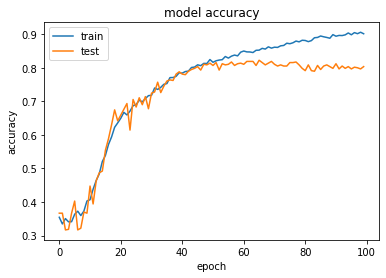

In [27]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

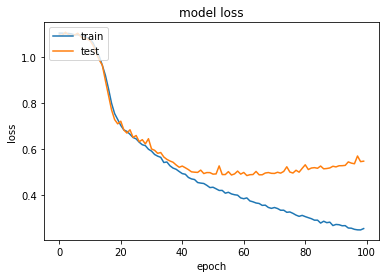

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
score = model.evaluate(test_X_data, test_Y_data, verbose=0, batch_size=64)
print("Test Accuracy of {}: {}".format(model_path, score[1]))

Test Accuracy of /root/corona/hatespeech/models/modell.h5: 0.7955326437950134


In [30]:
from numpy import argmax
from sklearn.metrics import classification_report

length = len(test_x_data)
y_true = test_y_data
y_pred = []
y_predict = model.predict(test_X_data)

for i in range(length):
    y_pred.append(argmax(y_predict[i]))

target_names = ['0', '1','2']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.68      0.75      0.72       194
           1       0.85      0.74      0.79       194
           2       0.87      0.90      0.89       194

    accuracy                           0.80       582
   macro avg       0.80      0.80      0.80       582
weighted avg       0.80      0.80      0.80       582



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
comfmat = pd.DataFrame(confusion_matrix(y_true, y_pred), index=['nohate','sexism','racism'],columns=['nohate','sexism','racism'])
comfmat

,nohate,sexism,racism
nohate,146,24,24
sexism,50,143,1
racism,18,2,174


In [32]:
# from pandas import DataFrame
# df = DataFrame({'text': test_x_data,'true': y_true, 'predict' : y_pred})
# all_nohate = df.loc[(df['true'] == 0) & (df['predict'] == 0)]
# all_sexism = df.loc[(df['true'] == 1) & (df['predict'] == 1)]
# all_racism = df.loc[(df['true'] == 2) & (df['predict'] == 2)]

# True_nohate_Pred_sexism = df.loc[(df['true'] == 0) & (df['predict'] == 1)]
# True_nohate_Pred_racism = df.loc[(df['true'] == 0) & (df['predict'] == 2)]

# True_sexsim_Pred_nohate = df.loc[(df['true'] == 1) & (df['predict'] == 0)]
# True_sexsim_Pred_racism = df.loc[(df['true'] == 1) & (df['predict'] == 2)]

# True_racism_Pred_nohate = df.loc[(df['true'] == 2) & (df['predict'] == 0)]
# True_racism_Pred_sexism = df.loc[(df['true'] == 2) & (df['predict'] == 1)]

In [33]:
# path = './Check_result/waseem/'
# all_nohate.to_csv(path+'all_nohate.csv')
# all_sexism.to_csv(path+'all_sexism.csv')
# all_racism.to_csv(path+'all_racism.csv')

# True_nohate_Pred_sexism.to_csv(path+'True_nohate_Pred_sexism.csv')
# True_nohate_Pred_racism.to_csv(path+'True_nohate_Pred_racism.csv')

# True_sexsim_Pred_nohate.to_csv(path+'True_sexsim_Pred_nohate.csv')
# True_sexsim_Pred_racism.to_csv(path+'True_sexsim_Pred_racism.csv')

# True_racism_Pred_nohate.to_csv(path+'True_racism_Pred_nohate.csv')
# True_racism_Pred_sexism.to_csv(path+'True_racism_Pred_sexism.csv')

In [2]:
import seaborn as sns

word_rev_index={}
for word, i in tokenizer.word_index.items():
    word_rev_index[i] = word

def sentiment_analysis(review):        
    tokenized_sentences = doc2hierarchical(review)
    
    # word attention만 가져오기
    pred_attention = attention_extractor.predict(np.asarray([tokenized_sentences]))[0][0]
    sent_attention = attention_extractor.predict(np.asarray([tokenized_sentences]))[1][0]
    print(sent_attention)
    sent_att_labels=[]
    for sent_idx, sentence in enumerate(tokenized_sentences):
        if sentence[-1] == 0:
            continue
        sent_len = sent_idx
        sent_att_labels.append("Sentance "+str(sent_idx+1))
    sent_att = sent_attention[0:sent_len+1]
    sent_att = np.expand_dims(sent_att, axis=0)
    sent_att_labels = np.expand_dims(sent_att_labels, axis=0) 

    for sent_idx, sentence in enumerate(tokenized_sentences):
        if sentence[-1] == 0:
            continue
        
        for word_idx in range(MAX_SENTENCE_LENGTH):
            if sentence[word_idx] != 0:
                words = [word_rev_index[word_id] for word_id in sentence[word_idx:]]
                pred_att = pred_attention[sent_idx][-len(words):]
                pred_att = np.expand_dims(pred_att, axis=0)
                break


        fig, ax = plt.subplots(figsize=(1,1))
        plt.rc('xtick', labelsize=16)
        #cmap="Blues",cmap='YlGnBu"
        heatmap = sns.heatmap([[sent_att[0][sent_idx]]], xticklabels=False, yticklabels=False,cbar = False , annot=[[sent_att_labels[0][sent_idx]]],fmt ='', square=True, linewidths=0.1, cmap='coolwarm', center=0, vmin=0, vmax=1)
        plt.xticks(rotation=45)
        plt.show()
        
        
        
        fig, ax = plt.subplots(figsize=(len(words), 2))
        plt.rc('xtick', labelsize=16)
        pred_att
        word_list = np.expand_dims(words, axis=0)
        heatmap = sns.heatmap(pred_att, xticklabels=False, yticklabels=False,cbar=False, square=True,annot=word_list ,fmt ='', annot_kws={"alpha":1,'rotation':15},cmap ="coolwarm_r", linewidths=0.2, center=0, vmin=0, vmax=1)
        plt.xticks(rotation=45)
        plt.show()

NameError: name 'tokenizer' is not defined

In [ ]:
text =  "== Dear Yandman == Fuck you, do not censor me, cuntface. I think my point about French people being smelly frogs is very valid, it is not a matter of opinion. You go to hell you dirty bitch. Hugs and kisses Your secret admirer "
sentiment_analysis(text)